<a href="https://colab.research.google.com/github/omsharma-001/Computer_Vision_Models/blob/main/CNN_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2023-05-19 17:12:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 172.217.214.128, 172.253.114.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   145MB/s    in 1.1s    

2023-05-19 17:12:28 (145 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_10_percent'
There are 10 directories and 0 images in '10_food_classes_10_percent/test'
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_dir, target_size = IMAGE_SHAPE, batch_size = BATCH_SIZE, class_mode = "categorical")
test_data = test_datagen.flow_from_directory(train_dir, target_size = IMAGE_SHAPE, batch_size = BATCH_SIZE, class_mode = "categorical")


Found 750 images belonging to 10 classes.
Found 750 images belonging to 10 classes.


In [ ]:
import datetime
import tensorflow as tf

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" +  experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
  return tensorboard_callback

In [ ]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
efficient_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
def create_model(model_url, num_classes =10):
  feature_extractor_layer = hub.KerasLayer(model_url, trainable = False, name = "feature_extraction_layer", input_shape = IMAGE_SHAPE+(3,))
  model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(num_classes, activation = "softmax")
 ])

  return model

In [ ]:
resnet_model = create_model(resnet_url, num_classes = train_data.num_classes)


In [ ]:
resnet_model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(lr = 0.001), metrics = ["accuracy"])

In [ ]:
history = resnet_model.fit(train_data, epochs = 5, validation_data = test_data, callbacks = [create_tensorboard_callback(dir_name = "tensorflow_hub", experiment_name = "resnet50v2")])

Epoch 1/5
24/24 [==============================] - 19s 465ms/step - loss: 1.9931 - accuracy: 0.3547 - val_loss: 1.1567 - val_accuracy: 0.6613
Epoch 2/5
24/24 [==============================] - 8s 324ms/step - loss: 0.9480 - accuracy: 0.7147 - val_loss: 0.7093 - val_accuracy: 0.8093
Epoch 3/5
24/24 [==============================] - 8s 344ms/step - loss: 0.6393 - accuracy: 0.8253 - val_loss: 0.5163 - val_accuracy: 0.8840
Epoch 4/5
24/24 [==============================] - 8s 345ms/step - loss: 0.4859 - accuracy: 0.8880 - val_loss: 0.4107 - val_accuracy: 0.9053
Epoch 5/5
24/24 [==============================] - 7s 315ms/step - loss: 0.4006 - accuracy: 0.9160 - val_loss: 0.3338 - val_accuracy: 0.9387


In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()
  plt.figure()

  plt.plot(epochs, accuracy, label = "acuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()








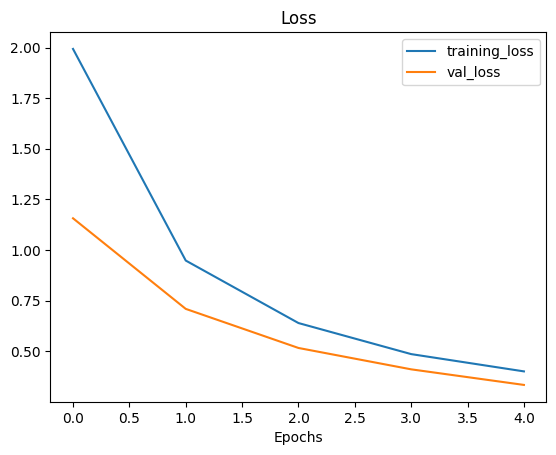

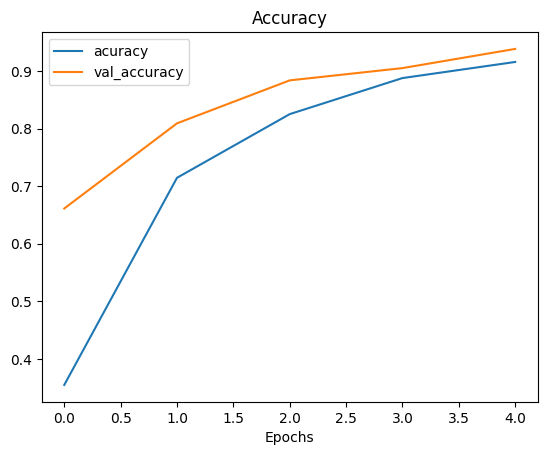

In [ ]:
plot_loss_curves(history)

In [ ]:
efficient_model = create_model(model_url = efficient_url, num_classes = train_data.num_classes)

In [ ]:
efficient_model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(lr = 0.001), metrics = ["accuracy"])
history_2 = efficient_model.fit(train_data, epochs = 5, validation_data = test_data, callbacks = [create_tensorboard_callback(dir_name = "tensorflow_hub", experiment_name = "efficientnetb0")])

Epoch 1/5
24/24 [==============================] - 19s 420ms/step - loss: 1.8531 - accuracy: 0.4293 - val_loss: 1.2956 - val_accuracy: 0.7360
Epoch 2/5
24/24 [==============================] - 7s 301ms/step - loss: 1.0682 - accuracy: 0.7747 - val_loss: 0.8444 - val_accuracy: 0.8267
Epoch 3/5
24/24 [==============================] - 8s 338ms/step - loss: 0.7608 - accuracy: 0.8387 - val_loss: 0.6523 - val_accuracy: 0.8667
Epoch 4/5
24/24 [==============================] - 9s 375ms/step - loss: 0.6137 - accuracy: 0.8587 - val_loss: 0.5404 - val_accuracy: 0.8920
Epoch 5/5
24/24 [==============================] - 8s 333ms/step - loss: 0.5132 - accuracy: 0.8907 - val_loss: 0.4632 - val_accuracy: 0.9067


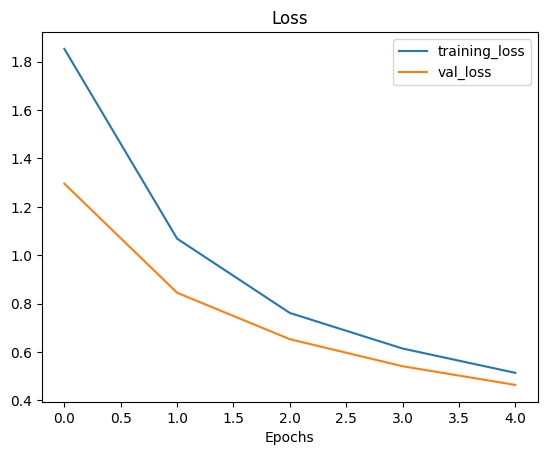

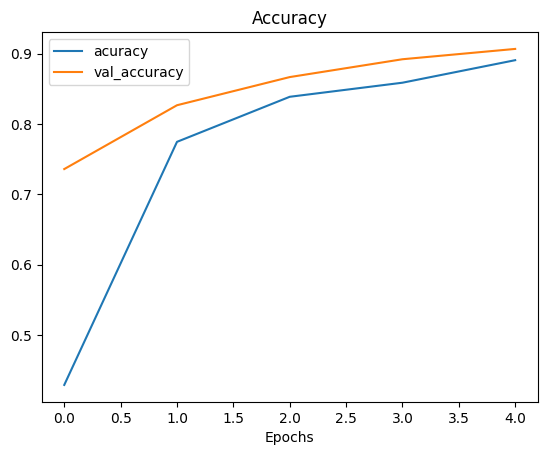

In [ ]:
plot_loss_curves(history_2)

In [ ]:
!tensorboard dev upload --logdir ./tensorflow_hub/ \
 --name "EfficientNetB0 vs. resNet50V2" \
 --description "Comparing two different TF Hub feature extraction model architectures 10 % of the training data" \
 --one_shot

2023-05-19 17:20:41.753663: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorflow_hub/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   DFK-PYR-VYS



New experiment created. View your TensorBoard at: https://tensorboard.dev/ex

In [ ]:
!tensorboard dev list

2023-05-19 17:26:02.605452: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
https://tensorboard.dev/experiment/rK6jI8hkTZGO5E0Ygpvjmw/
	Name                 EfficientNetB0 vs. resNet50V2
	Description          Comparing two different TF Hub feature extraction model architectures 10 % of the training data
	Id                   rK6jI8hkTZGO5E0Ygpvjmw
	Created              2023-05-19 17:22:17 (3 minutes ago)
	Updated              2023-05-19 17:22:22 (3 minutes ago)
	Runs                 10
	Tags                 5
	Scalars              150
	Tensor bytes         0
	Binary object bytes  13352419
Total: 1 experiment(s)
